<a href="https://colab.research.google.com/github/jsja22/ai/blob/master/seq1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dat_df = pd.read_csv('/content/drive/MyDrive/energydata.csv',sep=',')
dat_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09


In [ ]:
dat_df.columns
#Index(['date' :날짜, 'Appliances':가전제품 전력사용량, 'lights':조명 전력사용량, 'T1':부억온도
#  'RH_1':부엌 습도, 'T2': 거실온도, 'RH_2':거실 습도, 'T3':세탁실 온도,
#       'RH_3': 세탁실 습도, 'T4' : 사무실 온도, 'RH_4' : 사무실 습도, 'T5' : 욕실 온도, 'RH_5' : 욕실 습도],


Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5'],
      dtype='object')

In [ ]:
dat_df.shape

(17424, 13)

In [ ]:
dat_df.dtypes #datetime형으로 변환 해줘야함 날짜를

date           object
Appliances      int64
lights          int64
T1            float64
RH_1          float64
T2            float64
RH_2          float64
T3            float64
RH_3          float64
T4            float64
RH_4          float64
T5            float64
RH_5          float64
dtype: object

In [ ]:
dat_df['date'] = pd.to_datetime(dat_df['date'],format='%Y-%m-%d %H:%M:%S')
print(dat_df['date'].dtypes) #열은 datetime64[ns]로 변환
print(type(dat_df['date'][0]))     #열의 요소는 <class 'pandas._libs.tslibs.timestamps.Timestamp'>로 변환 
#date 형의 값은 그대로 사용하지 않고 최초의 날짜와 시간으로 부터의 경과시간으로 변환해서 사용!
#한행전과의 시간차 계산


datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
dat_df['dif_min'] = dat_df['date'].diff().dt.total_seconds()/60 #diff 한행전값과의 차이 계산
dat_df['dif_min'] = dat_df['dif_min'].fillna(0)  #fillna -> 결손값 Nan 을 0으로 보완 
print(dat_df['dif_min'].head())



0     0.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: dif_min, dtype: float64


In [ ]:
#경과 시간 계산 
dat_df['cum_min'] = dat_df['dif_min'].cumsum()  #dif_min의 누적합계 구하기
dat_df[['date','cum_min']].head()

,date,cum_min
0,2016-01-11 17:00:00,0.0
1,2016-01-11 17:10:00,10.0
2,2016-01-11 17:20:00,20.0
3,2016-01-11 17:30:00,30.0
4,2016-01-11 17:40:00,40.0


In [ ]:
#결손값 확인
print(dat_df.isnull().sum(axis=1).sort_values(ascending=False))
print(dat_df.isnull().sum(axis=0))

8586     1
11427    1
9699     1
14047    1
8604     1
        ..
11609    0
11608    0
11607    0
11606    0
0        0
Length: 17424, dtype: int64
date          0
Appliances    0
lights        0
T1            1
RH_1          0
T2            0
RH_2          1
T3            2
RH_3          0
T4            0
RH_4          0
T5            1
RH_5          0
dif_min       0
cum_min       0
dtype: int64


In [ ]:
#각 항목의 통계량 계산
dat_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,dif_min,cum_min
count,17424.000000,17424.000000,17423.000000,17424.000000,17424.000000,17423.000000,17422.000000,17424.000000,17424.000000,17424.000000,17423.000000,17424.000000,17424.000000,17424.000000
mean,97.136134,4.032943,21.370848,39.892301,19.960777,40.209553,21.851889,39.165869,20.437045,38.753288,19.198926,51.053839,9.999426,87115.000000
std,103.247863,8.131761,1.407637,3.716096,1.949825,3.836293,1.705699,3.210397,1.775985,4.274644,1.525227,9.092618,0.075758,50300.198807
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,30.663333,15.100000,27.660000,15.330000,29.815000,0.000000,0.000000
25%,50.000000,0.000000,20.600000,37.163333,18.666667,37.863333,20.600000,36.790000,19.338333,35.326667,18.100000,45.400000,10.000000,43557.500000
50%,60.000000,0.000000,21.390000,39.326667,19.700000,40.360000,21.790000,38.420667,20.390000,38.133333,19.100000,48.900000,10.000000,87115.000000
75%,100.000000,0.000000,22.200000,42.566875,20.926667,43.000000,22.890000,41.433333,21.500000,41.658333,20.200000,53.830278,10.000000,130672.500000
max,1080.000000,70.000000,25.700000,63.360000,29.856667,56.026667,27.600000,50.163333,26.200000,51.090000,25.745000,96.321667,10.000000,174230.000000


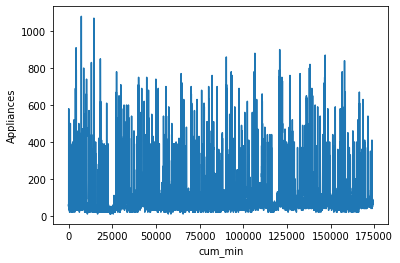

In [ ]:
#시각화
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dat_df['cum_min'],dat_df['Appliances'])

plt.xlabel('cum_min')
plt.ylabel('Appliances')
plt.show()
